# Área Malha

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections
from matplotlib import tri

Ref.: https://brasilescola.uol.com.br/amp/matematica/Area-uma-regiao-triangular-atraves-determinante.htm

## Malha Estruturada (Triângular)

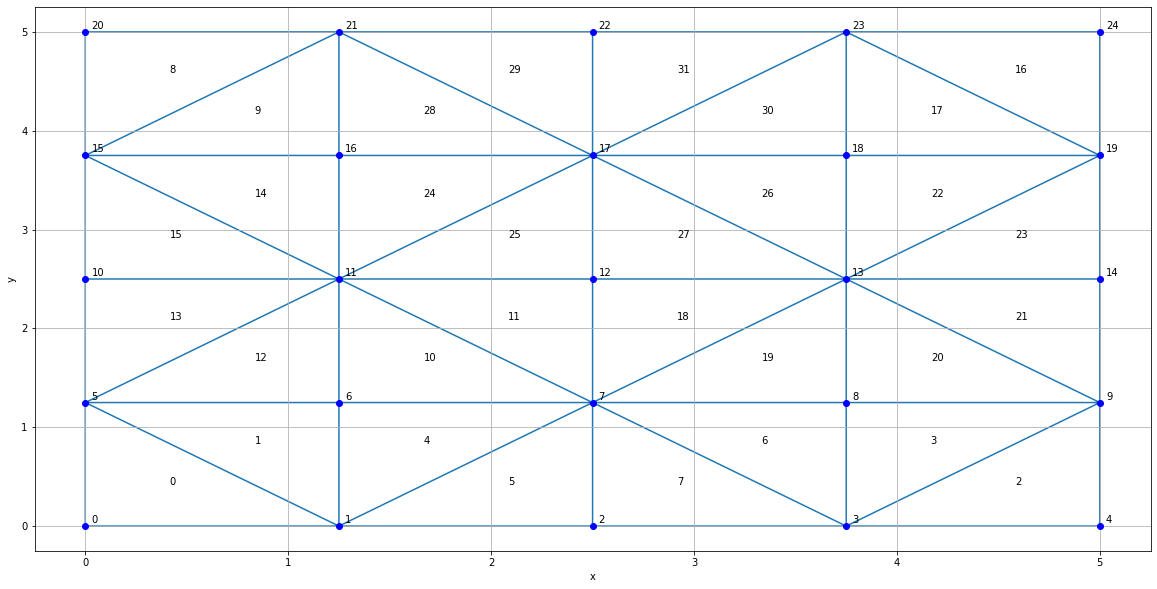

In [2]:
# Coordenadas usando linspace
Lx = 5;
Ly = 5;
Nx = 5;
Ny = 5;
npoints = Nx*Ny
x = np.linspace(0,Lx,Nx)
y = np.linspace(0,Ly,Ny)

X,Y = np.meshgrid(x, y)
X = X.flatten() # transforma para vetor
Y = Y.flatten()

triang = tri.Triangulation(X,Y)
IEN = triang.triangles

plt.figure(figsize=(20, 10))
plt.plot(X,Y,'bo')
plt.triplot(X,Y,IEN)
plt.xlabel('x'); plt.ylabel('y')
plt.grid()

for i in range(0,npoints):
    plt.text(X[i]+0.03,Y[i]+0.03,str(i))

# loop em todos os elementos
for e in range(0,IEN.shape[0]):
    v1,v2,v3 = IEN[e]
 # calculo do centro de massa, ou centro geometrico
    Xm = (X[v1]+X[v2]+X[v3])/3.0
    Ym = (Y[v1]+Y[v2]+Y[v3])/3.0
    plt.text(Xm,Ym,str(e))

plt.show()

In [3]:
v = np.zeros(3, dtype='int')
A = np.zeros((3,3), dtype='float')
S = np.zeros(len(IEN), dtype='float')
for j in range(0,len(IEN)):
    v[0], v[1], v[2] = IEN[j]

    for i in range(0,3):
        A[i,0] = X[v[i]]
        A[i,1] = Y[v[i]]
        A[i,2] = 1

    det = abs(np.linalg.det(A))
    S[j] = 0.5*det

print('Área individual:', S[j])
print('Área total:', sum(S))

Área individual: 0.7812500000000001
Área total: 25.0


In [4]:
a = np.zeros((IEN.shape[0]),dtype='float' )
for i in range(0,IEN.shape[0]):
    v1,v2,v3 = IEN[i]
    a[i] = (X[v1]-X[v2])*(Y[v1]-Y[v3])/2
    if a[i]==0:
        a[i] = (X[v3]-X[v1])*(Y[v1]-Y[v2])/2


In [5]:
sum(a)

25.0

## Malha Aleatória

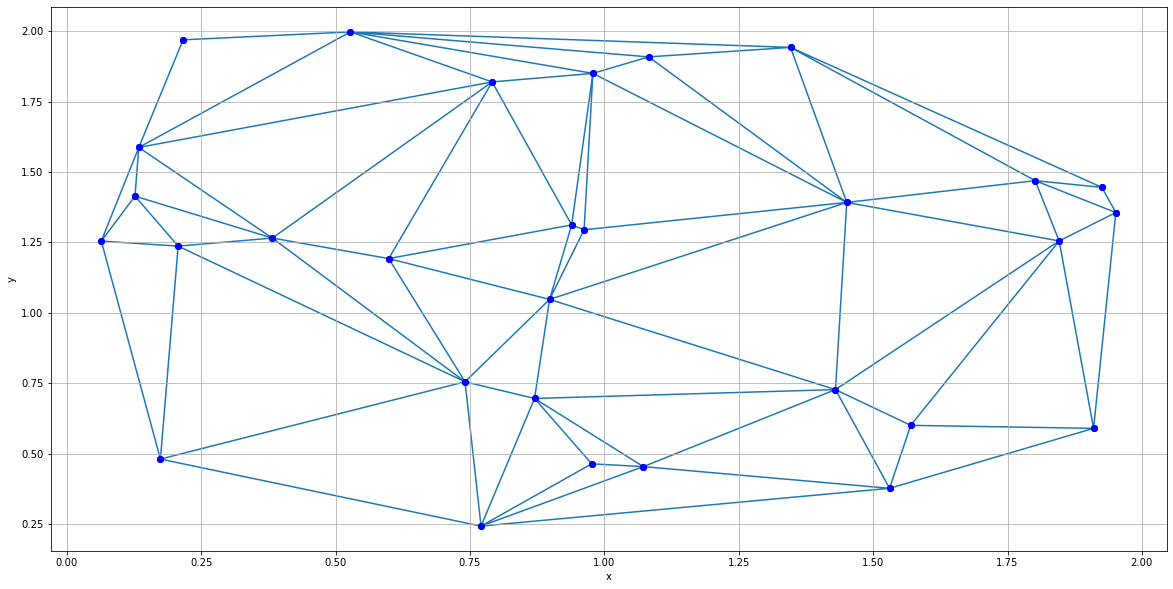

In [6]:
Lx = 2.0
Ly = 2.0
npoints = 30

# coordenadas dos pontos
coords = np.random.random( (npoints,2) )
X = coords[:,0]*Lx
Y = coords[:,1]*Ly

plt.figure(figsize=(20, 10))
ax = plt.axes()
plt.plot(X,Y,'bo')

# triangulacao Delaunay
triang = tri.Triangulation(X,Y)
IEN = triang.triangles

plt.plot(X,Y,'bo')
plt.triplot(X,Y,IEN)
plt.xlabel('x'); plt.ylabel('y')
plt.grid()
plt.show()

In [7]:
v = np.zeros(3, dtype='int')
A = np.zeros((3,3), dtype='float')
S = np.zeros(len(IEN), dtype='float')
for j in range(0,len(IEN)):
    v[0], v[1], v[2] = IEN[j]

    for i in range(0,3):
        A[i,0] = X[v[i]]
        A[i,1] = Y[v[i]]
        A[i,2] = 1

    det = abs(np.linalg.det(A))
    S[j] = 0.5*det

print('Área total:', sum(S))

Área total: 2.725378677652012


## Malha Gmsh

In [8]:
import meshio

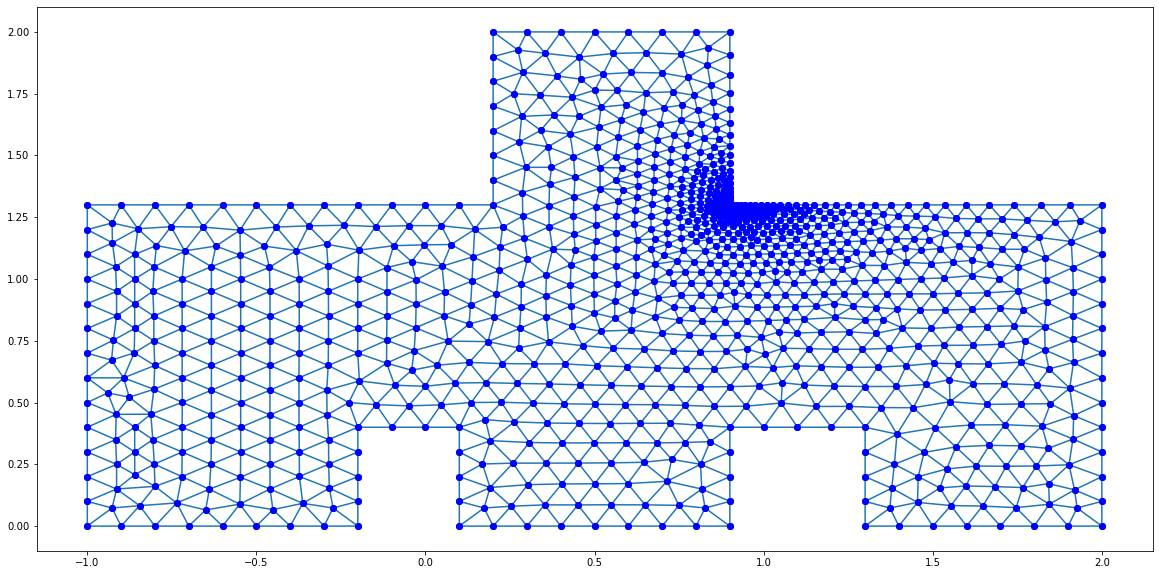

In [9]:
# leitura da malha no GMSH
#msh = meshio.read('primeira_malha.msh')
msh = meshio.read('malha-carro.msh')
X = msh.points[:,0]
Y = msh.points[:,1]
IEN = msh.cells[0].data
npoints = len(X)
ne = IEN.shape[0]

plt.figure(figsize=(20, 10))
ax = plt.axes()
plt.plot(X,Y,'bo')

plt.plot(X,Y,'bo')
plt.triplot(X,Y,IEN)
plt.show()

In [10]:
v = np.zeros(3, dtype='int')
A = np.zeros((3,3), dtype='float')
S = np.zeros(len(IEN), dtype='float')
for j in range(0,len(IEN)):
    v[0], v[1], v[2] = IEN[j]

    for i in range(0,3):
        A[i,0] = X[v[i]]
        A[i,1] = Y[v[i]]
        A[i,2] = 1

    det = abs(np.linalg.det(A))
    S[j] = 0.5*det

print('Área total:', sum(S))

Área total: 4.110000000000001


## Malha Quadrada

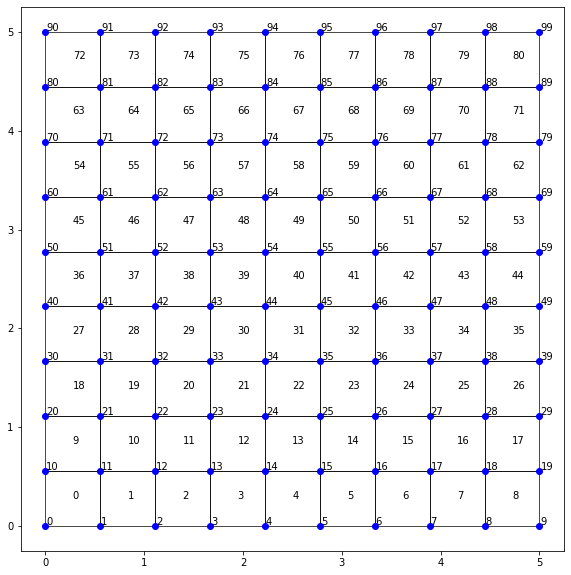

In [11]:
# Dados da malha
Lx = 5.0                                             
Ly = 5.0                                             
nx = 10                                             
ny = 10                                              
npoints = nx*ny                                      
nq = (nx-1)*(ny-1)                                   

xv = np.linspace(0,Lx,nx)
yv = np.linspace(0,Ly,ny)

[X,Y] = np.meshgrid(xv,yv)
X = np.reshape(X,npoints)
Y = np.reshape(Y,npoints)

IEN = np.zeros( (nq,4),dtype='int' )
for i in range(0,nq):
    j = i//(nx-1)
    IEN[i] = [i+j,i+1+j,i+(nx+1)+j,i+(nx)+j]

# plot malha de quadriláteros
xy = np.stack((X, Y), axis=-1)
verts = xy[IEN]
plt.figure(figsize=(20, 10))
ax=plt.gca()
pc = matplotlib.collections.PolyCollection(verts,edgecolors=('black',),
                                                 facecolors= 'None',
                                                 linewidths=(0.7,))
ax.add_collection(pc)
plt.plot(X,Y,"bo")

for i in range(0,npoints):
    plt.text(X[i]+0.01,Y[i]+0.01,str(i))

# loop em todos os elementos
for e in range(0,IEN.shape[0]):
    v1,v2,v3,v4 = IEN[e]
    # calculo do centro de massa, ou centro geometrico
    Xm = (X[v1]+X[v2])/2.0
    Ym = (Y[v1]+Y[v3])/2.0
    plt.text(Xm,Ym,str(e))

ax.set_aspect('equal')
plt.show()

In [12]:
v = np.zeros(4, dtype='int')
S = np.zeros(len(IEN), dtype='float')
for j in range(0,len(IEN)):
    v[0], v[1], v[2] , v[3]= IEN[j]
    S[j] = (X[v[1]]-X[v[0]])*(Y[v[2]]-Y[v[1]])

print('Área individual:', S[j])
print('Área total:', sum(S))

Área individual: 0.30864197530864174
Área total: 25.00000000000003
